In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import base64
import cv2
import io
from IPython.display import HTML, display
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [3]:
def img_to_html(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _, buffer = cv2.imencode('.png', img_rgb)
    base64_img = base64.b64encode(buffer).decode('utf-8')
    return f'<img src="data:image/png;base64,{base64_img}" width="80" height="80" />'

In [4]:
def extrair_histogramas(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_gray = cv2.normalize(hist_gray, hist_gray).flatten()

    hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

    hist_rgb = np.concatenate([
        cv2.normalize(hist_b, hist_b).flatten(),
        cv2.normalize(hist_g, hist_g).flatten(),
        cv2.normalize(hist_r, hist_r).flatten()
    ])
    return np.concatenate([hist_gray, hist_rgb])

In [20]:
images_names = ["../dataset/Apple/3_100.jpg", "../dataset/Apple/4_100.jpg", "../dataset/Apple/5_100.jpg"]
banco_imgs = [cv2.imread(name) for name in images_names]
X = np.array([extrair_histogramas(img) for img in banco_imgs])

query_img = cv2.imread("../dataset/Apple/9_100.jpg")
query = extrair_histogramas(query_img).reshape(1, -1)

knn = NearestNeighbors(n_neighbors=len(images_names), metric="euclidean")
knn.fit(X)

distances, indices = knn.kneighbors(query)

,Rank,Nome da Imagem,Distância,Similaridade,Imagem
0,1,../dataset/Apple/5_100.jpg,0.20519,0.83,
1,2,../dataset/Apple/3_100.jpg,0.23448,0.81,
2,3,../dataset/Apple/4_100.jpg,0.24016,0.81,

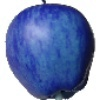
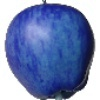
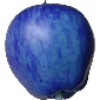

0    ../dataset/Apple/5_100.jpg
Name: Nome da Imagem, dtype: object

In [ ]:
results = []
for rank, idx in enumerate(indices[0]):
    image_name = images_names[idx]
    distance = round(float(distances[0][rank]), 5)
    similarity = round(float(1 / (1 + distance)), 2)
    image = img_to_html(banco_imgs[idx])
    results.append({
        "Rank": rank + 1,
        "Nome da Imagem":image_name,
        "Distância": distance,
        'Similaridade': similarity,
        "Imagem": image
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="Distância", ascending=True).reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
display(HTML(df_results.to_html(escape=False)))

df_results[df_results['Rank'] == 1]['Nome da Imagem']
